# Light Curve Similarity

In [6]:
import pandas as pd
import lightkurve as lk

data = pd.read_csv("classes_0/output/test_output.csv", index_col=[0, 1])
data

,,filename,ebs_true,exo_true,flares_true,rot_true,ebs_pred,exo_pred,flares_pred,rot_pred
TIC,sector,,,,,,,,,
366972961,25,tess2020133194932-s0025-0000000366972961-0182-...,1.0,0.0,0.0,0.0,9.999596e-01,0.000037,3.019596e-08,3.104273e-06
349156098,31,tess2020294194027-s0031-0000000349156098-0198-...,1.0,0.0,0.0,0.0,1.254193e-04,0.999809,1.567031e-05,4.990502e-05
139804406,1,tess2018206045859-s0001-0000000139804406-0120-...,0.0,0.0,1.0,0.0,1.715873e-06,0.999209,3.459247e-04,4.439457e-04
237913194,28,tess2020212050318-s0028-0000000237913194-0190-...,0.0,1.0,0.0,0.0,5.455609e-09,0.999967,1.587930e-05,1.732106e-05
238123653,7,tess2019006130736-s0007-0000000238123653-0131-...,0.0,0.0,0.0,1.0,2.548079e-04,0.000998,4.702520e-04,9.982773e-01
...,...,...,...,...,...,...,...,...,...,...
264461976,32,tess2020324010417-s0032-0000000264461976-0200-...,0.0,0.0,0.0,1.0,7.082792e-01,0.018903,4.651374e-03,2.681664e-01
339960875,7,tess2019006130736-s0007-0000000339960875-0131-...,0.0,0.0,0.0,1.0,8.784950e-01,0.065435,4.199857e-03,5.187062e-02
343173162,24,tess2020106103520-s0024-0000000343173162-0180-...,0.0,0.0,0.0,1.0,5.486069e-05,0.005416,9.091045e-04,9.936206e-01


In [7]:
my_row = data.loc[349156098, 31]
new_data = data.drop((349156098, 31), axis=0)

In [8]:
import numpy as np
labels=["ebs", "exo", "flares", "rot"]
dist = np.sum([(my_row[l + "_pred"] - new_data[l + "_pred"])**2 for l in labels], axis=0)
new_data.iloc[np.argsort(dist)]

,,filename,ebs_true,exo_true,flares_true,rot_true,ebs_pred,exo_pred,flares_pred,rot_pred
TIC,sector,,,,,,,,,
286865921,37,tess2021091135823-s0037-0000000286865921-0208-...,0.0,1.0,0.0,0.0,1.266546e-04,0.999829,2.071826e-05,2.307837e-05
239816546,45,tess2021310001228-s0045-0000000239816546-0216-...,0.0,1.0,0.0,0.0,1.336337e-04,0.999826,2.199992e-05,1.784963e-05
229400092,41,tess2021204101404-s0041-0000000229400092-0212-...,0.0,1.0,0.0,0.0,1.191069e-04,0.999863,1.367184e-05,4.381325e-06
366622912,7,tess2019006130736-s0007-0000000366622912-0131-...,1.0,0.0,0.0,0.0,2.703798e-05,0.999826,1.065122e-04,4.021523e-05
250707118,58,tess2022302161335-s0058-0000000250707118-0247-...,0.0,1.0,0.0,0.0,6.299374e-06,0.999871,3.406169e-05,8.822739e-05
...,...,...,...,...,...,...,...,...,...,...
454191600,32,tess2020324010417-s0032-0000000454191600-0200-...,0.0,0.0,0.0,1.0,2.370608e-08,0.000014,9.788929e-05,9.998883e-01
12631605,4,tess2018292075959-s0004-0000000012631605-0124-...,1.0,0.0,0.0,0.0,9.999859e-01,0.000014,3.673189e-09,2.037646e-07
341125788,17,tess2019279210107-s0017-0000000341125788-0161-...,0.0,0.0,0.0,1.0,5.772242e-09,0.000014,7.194169e-05,9.999143e-01


In [9]:
def distance(v1, v_other, labels):
    return np.sum([(my_row[l + "_pred"] - new_data[l + "_pred"])**2 for l in labels], axis=0)

def get_similar_lightcurves(v1, v_other, labels=["ebs", "exo", "flares", "rot"], n=10):
    dist = distance(v1, v_other, labels)
    return v_other.iloc[np.argsort(dist)][:n]

In [12]:
import os
def construct_path(filename):
    obs_id = filename.replace("_wt.npy", "")
    filepath = os.path.join("mastDownload/TESS", obs_id, f"{obs_id}_lc.fits")
    return filepath

My light curve:


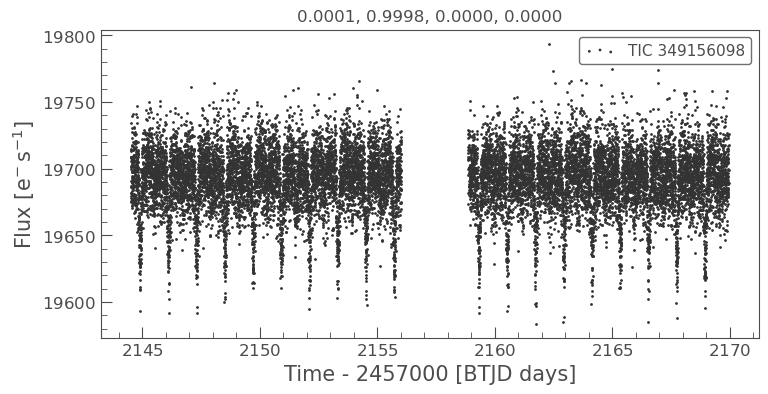

Top 10 most similar:


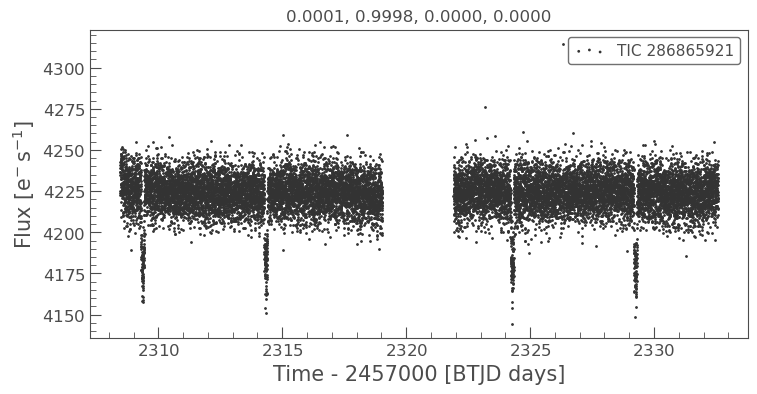

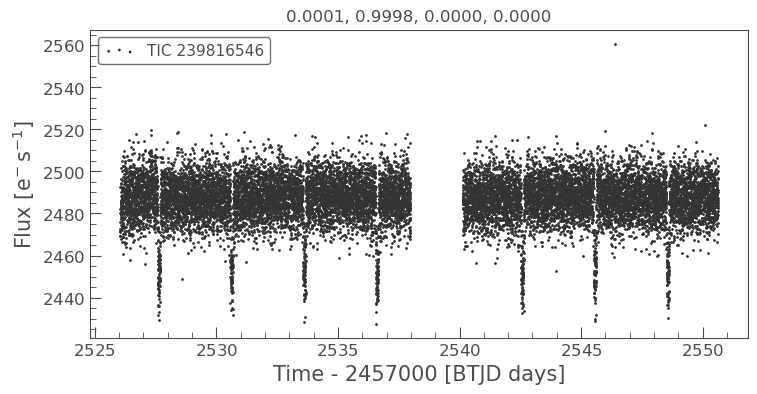

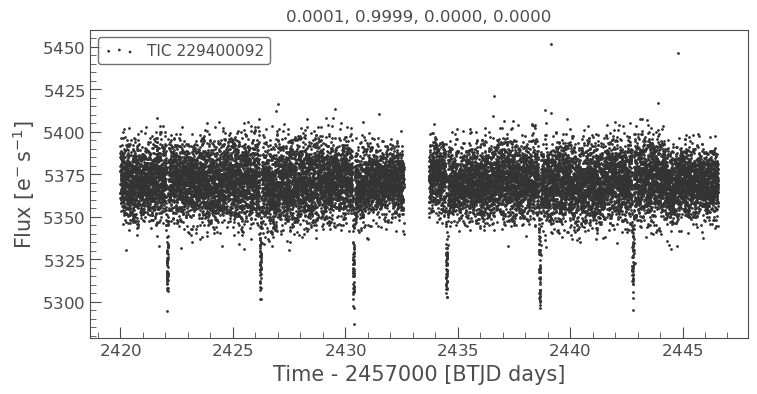

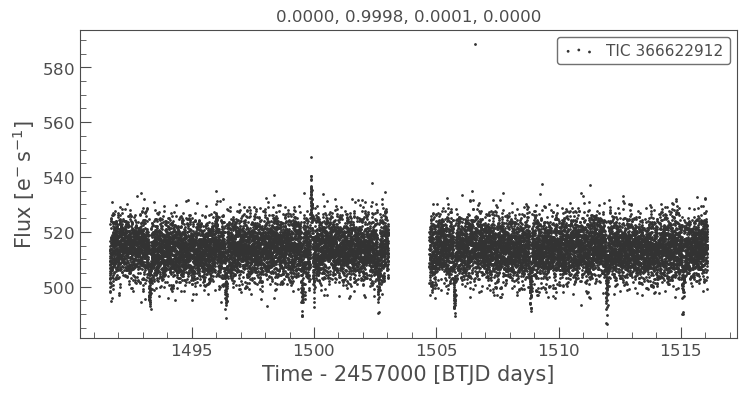

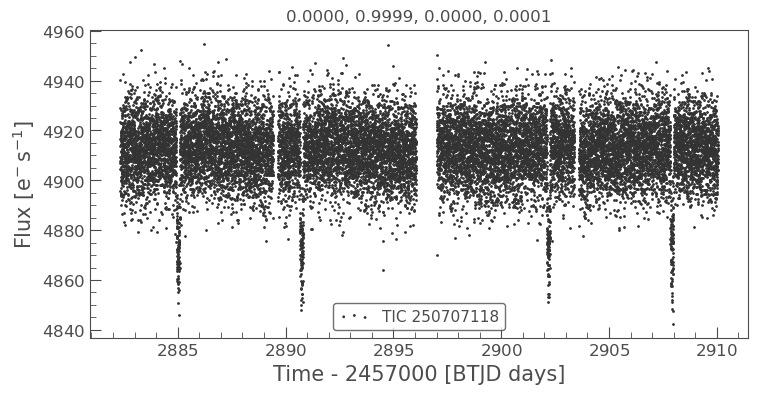

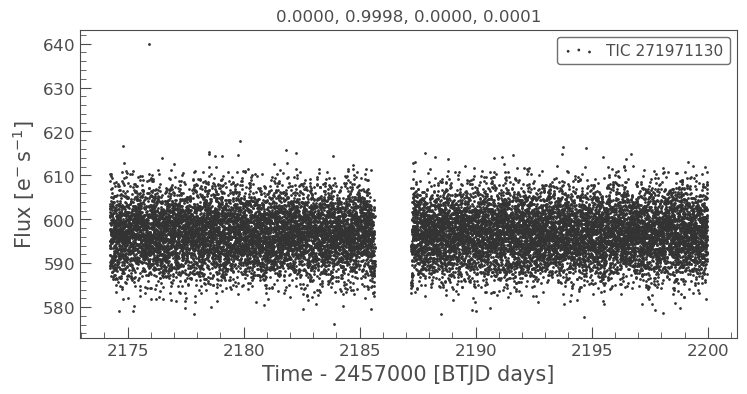

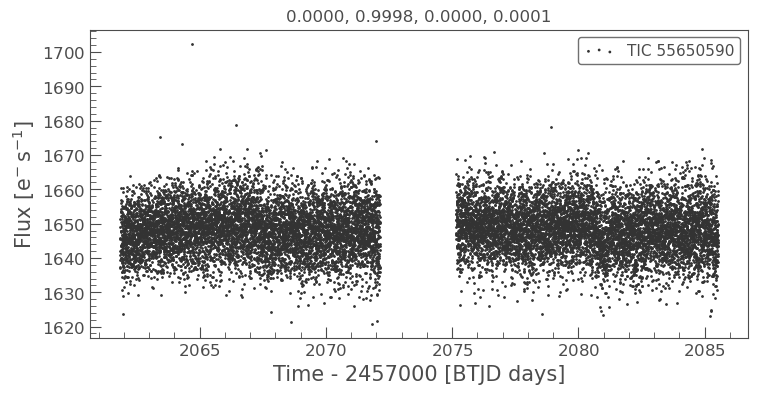

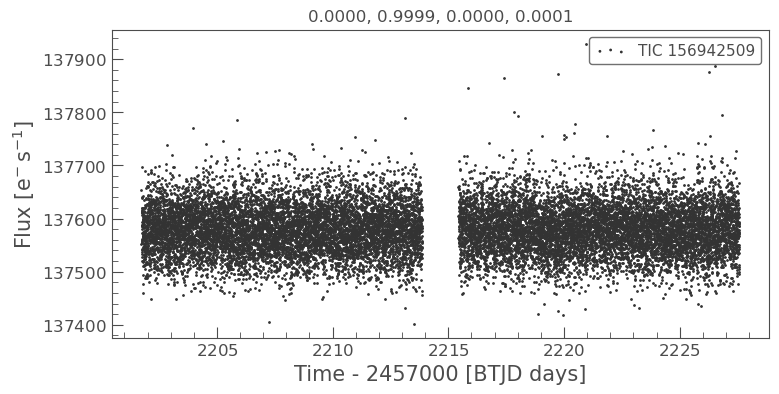

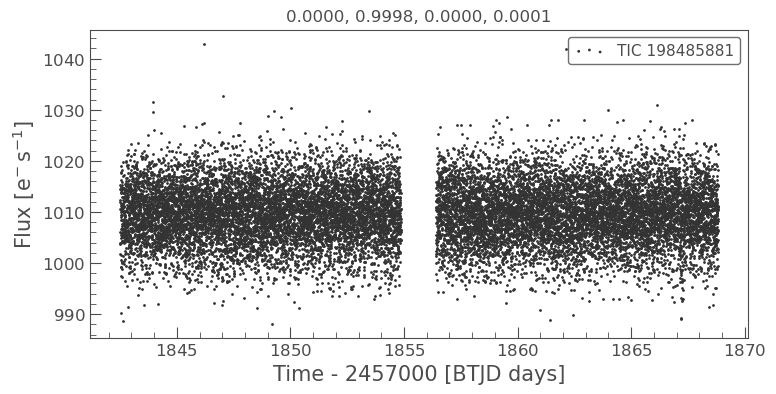

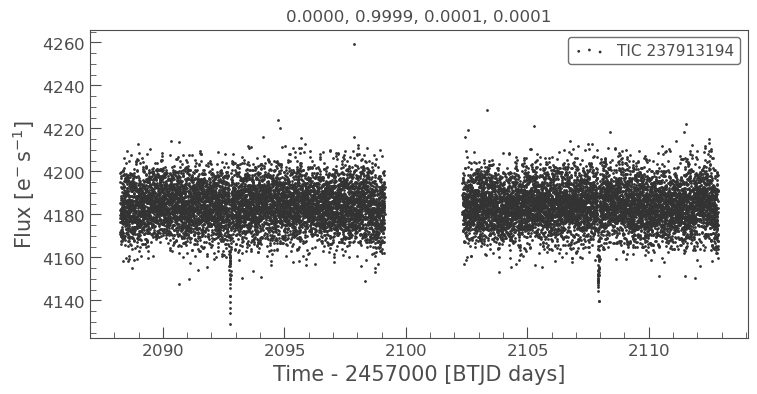

In [40]:
def format_preds(vals):
    return ", ".join(f"{v:.4f}" for v in vals)
    
import matplotlib.pyplot as plt
plt.close("all")
mylc = lk.read(construct_path(my_row["filename"]))
    
print("My light curve:")
ax = mylc.scatter()
ax.set_title(format_preds(my_row[["ebs_pred", "exo_pred", "flares_pred", "rot_pred"]].values))
plt.show()

print("Top 10 most similar:")
sim_targets = get_similar_lightcurves(my_row, new_data)
for idx, row in sim_targets.iterrows():
    fpath = construct_path(row["filename"])
    l = lk.read(fpath)
    ax = l.scatter()
    ax.set_title(format_preds(row[["ebs_pred", "exo_pred", "flares_pred", "rot_pred"]].values))
    plt.show()